## reading the data
- reading train data 
- check the null percentage of each feature

In [89]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import 

In [88]:
Normalizer??

In [58]:
train = pd.read_csv("./question4/Live.csv")

In [59]:
train.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [60]:
train.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [61]:
train.apply(lambda x: x.isna().sum()/len(x),axis = 0)

status_id           0.0
status_type         0.0
status_published    0.0
num_reactions       0.0
num_comments        0.0
num_shares          0.0
num_likes           0.0
num_loves           0.0
num_wows            0.0
num_hahas           0.0
num_sads            0.0
num_angrys          0.0
Column1             1.0
Column2             1.0
Column3             1.0
Column4             1.0
dtype: float64

In [62]:
train.dropna(axis=1,inplace = True)

In [63]:
train.apply(lambda x: x.isna().sum()/len(x),axis = 0)

status_id           0.0
status_type         0.0
status_published    0.0
num_reactions       0.0
num_comments        0.0
num_shares          0.0
num_likes           0.0
num_loves           0.0
num_wows            0.0
num_hahas           0.0
num_sads            0.0
num_angrys          0.0
dtype: float64

In [66]:
train.status_published = pd.to_datetime(train.status_published)

In [69]:
train.status_published = train.status_published.apply(lambda x:x.floor("1H"))

In [71]:
train.status_published

Timestamp('2012-07-15 02:00:00')

In [77]:
train['publish_year'] = train.status_published.dt.year
train['publish_month'] = train.status_published.dt.month
train['publish_day']= train.status_published.dt.day
train['publish_hour'] = train.status_published.dt.hour

In [81]:
train_x  = train.drop(['status_id','status_published'],axis = 1)

In [91]:
train_x = pd.get_dummies(train_x)

In [93]:
train_x.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,publish_year,publish_month,publish_day,publish_hour,status_type_link,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,2018,4,22,6,0,0,0,1
1,150,0,0,150,0,0,0,0,0,2018,4,21,22,0,1,0,0
2,227,236,57,204,21,1,1,0,0,2018,4,21,6,0,0,0,1
3,111,0,0,111,0,0,0,0,0,2018,4,21,2,0,1,0,0
4,213,0,0,204,9,0,0,0,0,2018,4,18,3,0,1,0,0


In [102]:
train.head(1)

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,publish_year,publish_month,publish_day,publish_hour
0,246675545449582_1649696485147474,video,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018,4,22,6


In [97]:
X = RobustScaler().fit_transform(train_x)

In [100]:
train_x.head(1)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,publish_year,publish_month,publish_day,publish_hour,status_type_link,status_type_photo,status_type_status,status_type_video
0,529,512,262,432,92,3,1,1,0,2018,4,22,6,0,0,0,1


In [103]:
X[0]

array([ 2.32425743, 22.08695652, 65.5       ,  2.2295082 , 30.66666667,
        3.        ,  1.        ,  1.        ,  0.        ,  0.5       ,
       -0.28571429,  0.4       , -0.14285714,  0.        , -1.        ,
        0.        ,  1.        ])

## Modeling 

In [123]:
from sklearn.cluster import DBSCAN,KMeans
from collections import Counter
from sklearn.decomposition import PCA, KernelPCA

In [110]:
clus = KMeans()

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

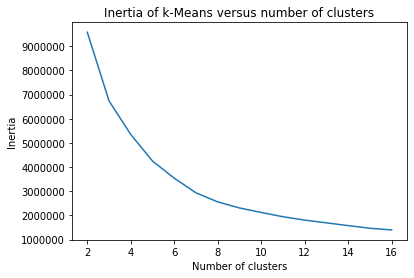

In [116]:
scores = [KMeans(n_clusters=i+2).fit(X).inertia_ 
          for i in range(15)]
sn.lineplot(np.arange(2, 17), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

In [122]:
Counter(clus.labels_)

Counter({4: 569, 0: 6142, 6: 48, 3: 90, 5: 3, 2: 162, 1: 34, 7: 2})

In [126]:
visual = PCA(n_components=2).fit_transform(X)

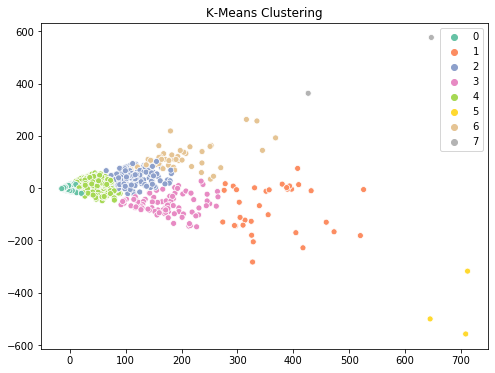

In [233]:
fig,ax = plt.subplots(figsize=(8,6))
sn.scatterplot(visual[:,0],visual[:,1],hue=clus.labels_,hue_order = [0,1,2,3,4,5,6,7],palette=sn.color_palette("Set2"))
ax.set_title('K-Means Clustering')
plt.show()

In [195]:
dbs = DBSCAN(eps = 2, min_samples=3)

In [196]:
dblabels = dbs.fit(X).labels_

In [204]:
Counter(dblabels)

Counter({-1: 1583,
         0: 5438,
         1: 3,
         2: 4,
         4: 3,
         3: 3,
         7: 4,
         5: 3,
         6: 3,
         9: 3,
         8: 3})

In [212]:
dbdata = np.concatenate((visual,dblabels.reshape(-1,1)),axis=1)

In [220]:
visualdata = dbdata[dbdata[:,2]!=-1,:]

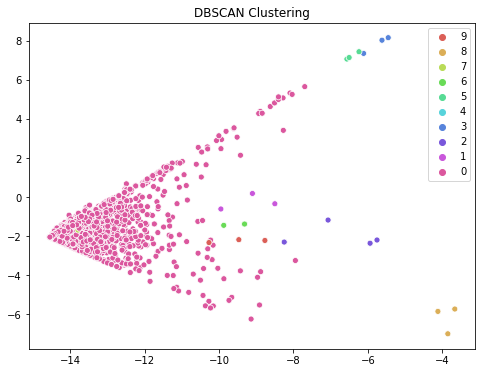

In [232]:
fig,ax = plt.subplots(figsize=(8,6))
sn.scatterplot(visualdata[:,0],visualdata[:,1],hue=visualdata[:,2],hue_order=[9,8,7,6,5,4,3,2,1,0],palette=sn.color_palette("hls",10))
ax.set_title('DBSCAN Clustering')
plt.show()